# Assignment 4 - Part 1: Predicting Heart Disease Using a Classification Tree

This notebook implements a classification tree model to predict whether a person is likely to have heart disease.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

# Set random state for reproducibility
RANDOM_STATE = 123
np.random.seed(RANDOM_STATE)

## 1.1 Data Cleaning (2 points)

In [2]:
# Load the dataset
column_names = ['age', 'sex', 'cp', 'restbp', 'chol', 'fbs', 'restecg', 
                'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'hd']

df = pd.read_csv('../input/processed.cleveland.data', 
                 names=column_names, 
                 na_values='?')

print("Original dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

Original dataset shape: (303, 14)

First few rows:
    age  sex   cp  restbp   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0   145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0   160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0   120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0   130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0   130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  hd  
0    3.0  0.0   6.0   0  
1    2.0  3.0   3.0   2  
2    2.0  2.0   7.0   1  
3    3.0  0.0   3.0   0  
4    1.0  0.0   3.0   0  


In [3]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Remove missing values
df = df.dropna()
print("\nDataset shape after removing missing values:", df.shape)

Missing values per column:
age        0
sex        0
cp         0
restbp     0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         4
thal       2
hd         0
dtype: int64

Dataset shape after removing missing values: (297, 14)


In [4]:
# Create binary variable y (1 if heart disease, 0 otherwise)
# hd > 0 indicates heart disease
y = (df['hd'] > 0).astype(int)
print("Distribution of target variable:")
print(y.value_counts())

# Drop the original hd column from features
X = df.drop('hd', axis=1)

Distribution of target variable:
hd
0    160
1    137
Name: count, dtype: int64


In [5]:
# Identify categorical variables to convert to dummy variables
# Categorical variables: sex, cp, fbs, restecg, exang, slope, ca, thal
categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, columns=categorical_vars, drop_first=True)

print("Features after creating dummy variables:")
print(X.columns.tolist())
print("\nDataset shape:", X.shape)

Features after creating dummy variables:
['age', 'restbp', 'chol', 'thalach', 'oldpeak', 'sex_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'fbs_1.0', 'restecg_1.0', 'restecg_2.0', 'exang_1.0', 'slope_2.0', 'slope_3.0', 'ca_1.0', 'ca_2.0', 'ca_3.0', 'thal_6.0', 'thal_7.0']

Dataset shape: (297, 20)


## 1.2 Data Analysis (8 points)

### (1 point) Split data and plot classification tree

In [6]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=RANDOM_STATE
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 207
Test set size: 90


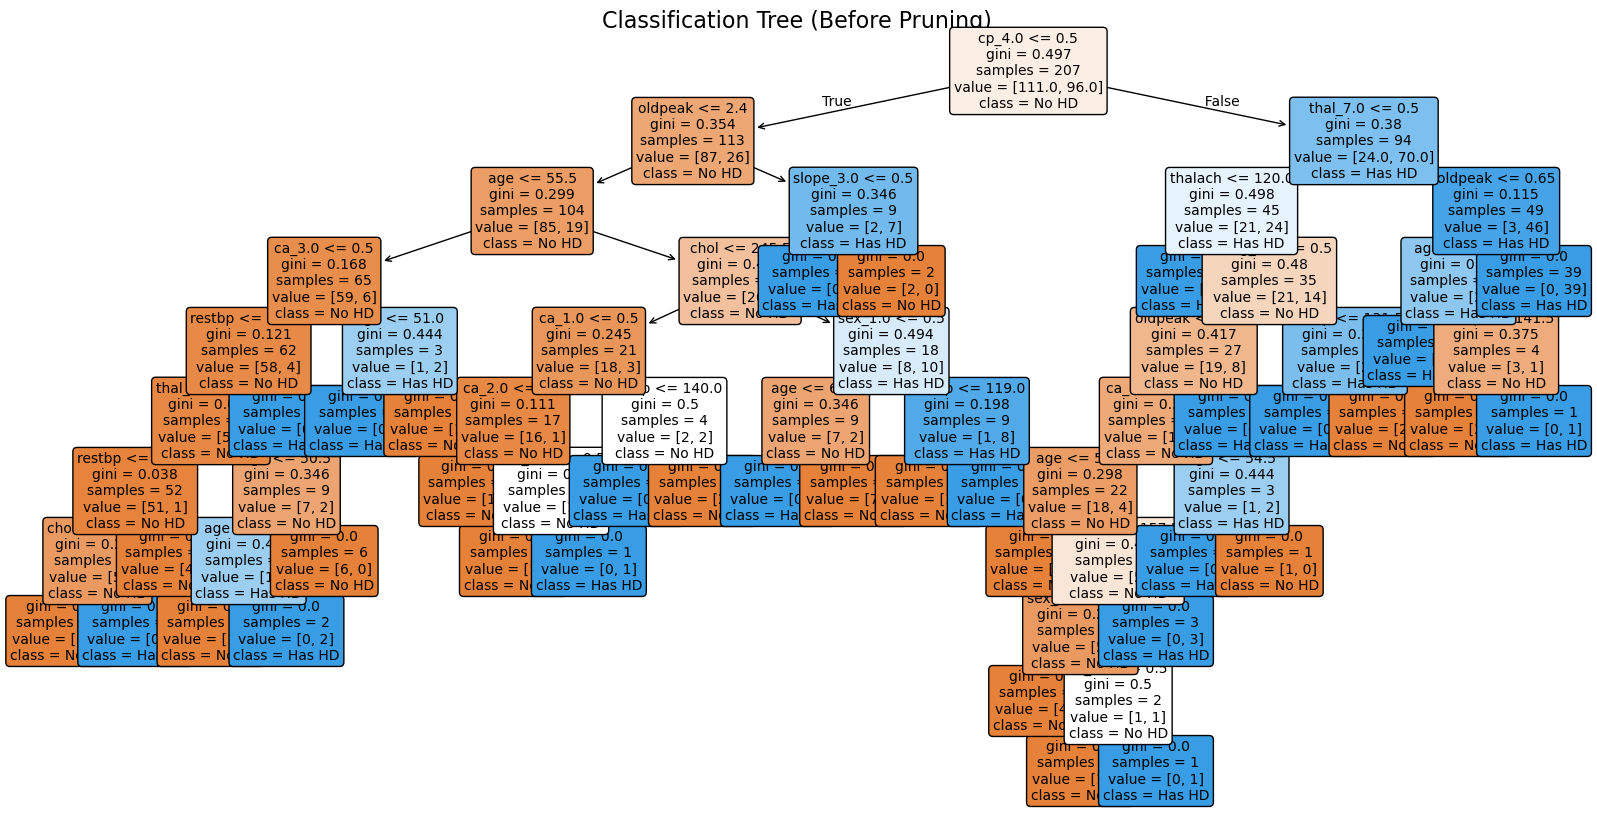

Tree depth: 10
Number of leaves: 35


In [7]:
# Train a classification tree without pruning
clf = DecisionTreeClassifier(random_state=RANDOM_STATE)
clf.fit(X_train, y_train)

# Plot the classification tree
plt.figure(figsize=(20, 10))
plot_tree(clf, 
          feature_names=X.columns, 
          class_names=['No HD', 'Has HD'],
          filled=True, 
          rounded=True,
          fontsize=10)
plt.title('Classification Tree (Before Pruning)', fontsize=16)
plt.savefig('../output/classification_tree_before_pruning.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Tree depth: {clf.get_depth()}")
print(f"Number of leaves: {clf.get_n_leaves()}")

### (2 points) Plot confusion matrix and interpret results

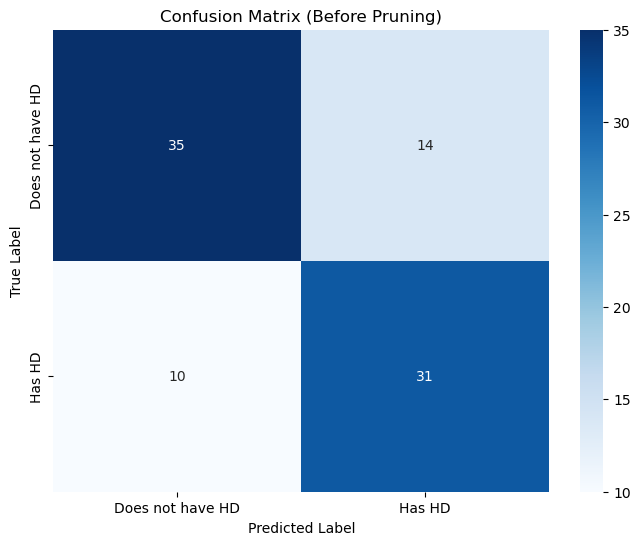

Accuracy on test set: 0.7333

Confusion Matrix:
True Negatives: 35
False Positives: 14
False Negatives: 10
True Positives: 31


In [8]:
# Make predictions on test set
y_pred = clf.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=["Does not have HD", "Has HD"],
            yticklabels=["Does not have HD", "Has HD"])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix (Before Pruning)')
plt.savefig('../output/confusion_matrix_before_pruning.png', dpi=300, bbox_inches='tight')
plt.show()

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.4f}")
print(f"\nConfusion Matrix:")
print(f"True Negatives: {cm[0, 0]}")
print(f"False Positives: {cm[0, 1]}")
print(f"False Negatives: {cm[1, 0]}")
print(f"True Positives: {cm[1, 1]}")

**Interpretation:**

The unpruned classification tree achieves 73.33% accuracy on the test set. The confusion matrix reveals:
- **True Negatives (35)**: The model correctly identified 35 individuals without heart disease, representing 71.4% specificity (35/49).
- **True Positives (31)**: The model correctly identified 31 individuals with heart disease, representing 75.6% sensitivity (31/41).
- **False Positives (14)**: 14 individuals were incorrectly predicted to have heart disease. While concerning, false positives in medical screening can lead to further testing.
- **False Negatives (10)**: 10 individuals with heart disease were missed. This is more critical as these patients may not receive necessary treatment.

The model shows relatively balanced performance between detecting disease (sensitivity) and correctly ruling it out (specificity), though the false negative rate of 24.4% indicates room for improvement in identifying all heart disease cases.

### (1.5 points) Fix overfitting using cross-validation

In [9]:
# Generate 50 values of alpha equally spaced on a logarithmic scale between e^-10 and 0.05
alpha_values = np.logspace(np.log(np.exp(-10)), np.log(0.05), 50, base=np.e)

print(f"Number of alpha values: {len(alpha_values)}")
print(f"Alpha range: {alpha_values.min():.10f} to {alpha_values.max():.4f}")

Number of alpha values: 50
Alpha range: 0.0000453999 to 0.0500


In [10]:
# Perform 4-fold cross-validation for each alpha
from sklearn.model_selection import cross_val_score

mean_accuracies = []
std_accuracies = []

for alpha in alpha_values:
    clf_temp = DecisionTreeClassifier(ccp_alpha=alpha, random_state=RANDOM_STATE)
    scores = cross_val_score(clf_temp, X_train, y_train, cv=4, scoring='accuracy')
    mean_accuracies.append(scores.mean())
    std_accuracies.append(scores.std())

# Find optimal alpha (maximum mean accuracy)
optimal_idx = np.argmax(mean_accuracies)
optimal_alpha = alpha_values[optimal_idx]
optimal_accuracy = mean_accuracies[optimal_idx]

print(f"Optimal alpha: {optimal_alpha:.10f}")
print(f"Optimal cross-validation accuracy: {optimal_accuracy:.4f}")

Optimal alpha: 0.0183827611
Optimal cross-validation accuracy: 0.7686


### (1.5 points) Plot Inaccuracy Rate vs Alpha

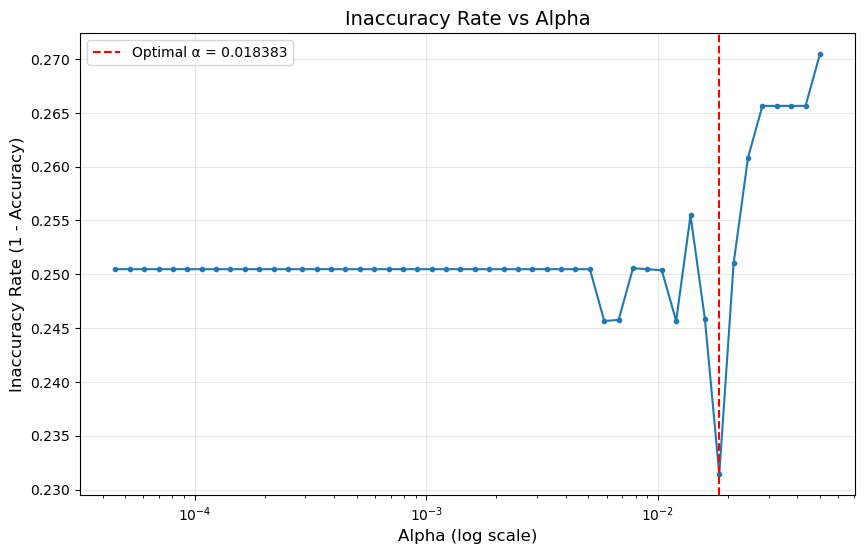

In [11]:
# Calculate inaccuracy rate (1 - Accuracy)
inaccuracy_rates = [1 - acc for acc in mean_accuracies]

# Plot Inaccuracy Rate vs Alpha
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, inaccuracy_rates, marker='o', markersize=3)
plt.axvline(x=optimal_alpha, color='r', linestyle='--', 
            label=f'Optimal α = {optimal_alpha:.6f}')
plt.xscale('log')
plt.xlabel('Alpha (log scale)', fontsize=12)
plt.ylabel('Inaccuracy Rate (1 - Accuracy)', fontsize=12)
plt.title('Inaccuracy Rate vs Alpha', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('../output/inaccuracy_vs_alpha.png', dpi=300, bbox_inches='tight')
plt.show()

### (2 points) Plot pruned tree and confusion matrix with optimal alpha

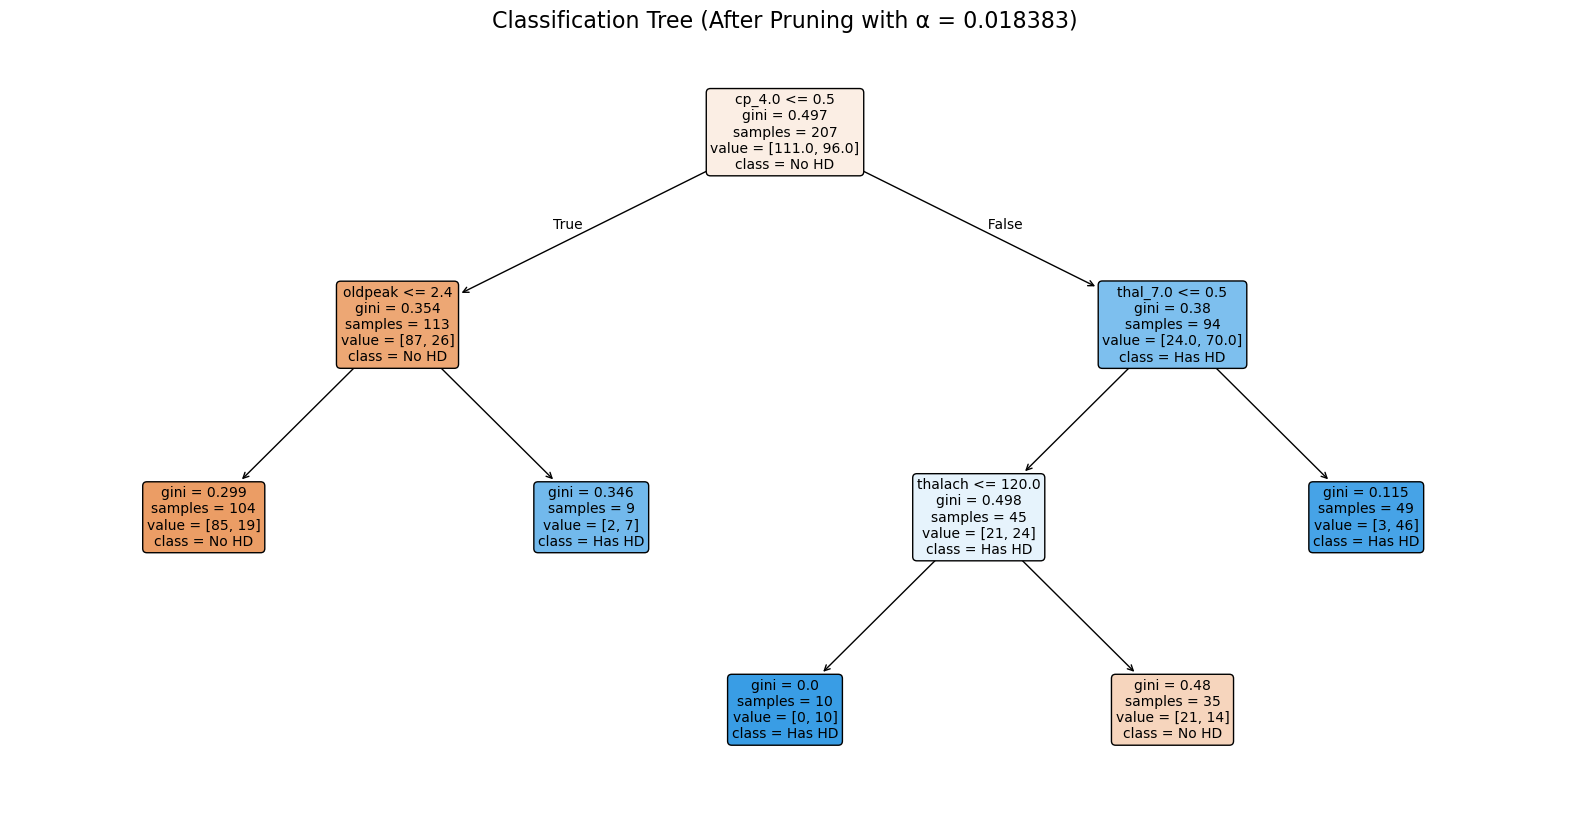

Pruned tree depth: 3
Pruned tree number of leaves: 5


In [12]:
# Train a classification tree with optimal alpha
clf_pruned = DecisionTreeClassifier(ccp_alpha=optimal_alpha, random_state=RANDOM_STATE)
clf_pruned.fit(X_train, y_train)

# Plot the pruned classification tree
plt.figure(figsize=(20, 10))
plot_tree(clf_pruned, 
          feature_names=X.columns, 
          class_names=['No HD', 'Has HD'],
          filled=True, 
          rounded=True,
          fontsize=10)
plt.title(f'Classification Tree (After Pruning with α = {optimal_alpha:.6f})', fontsize=16)
plt.savefig('../output/classification_tree_after_pruning.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Pruned tree depth: {clf_pruned.get_depth()}")
print(f"Pruned tree number of leaves: {clf_pruned.get_n_leaves()}")

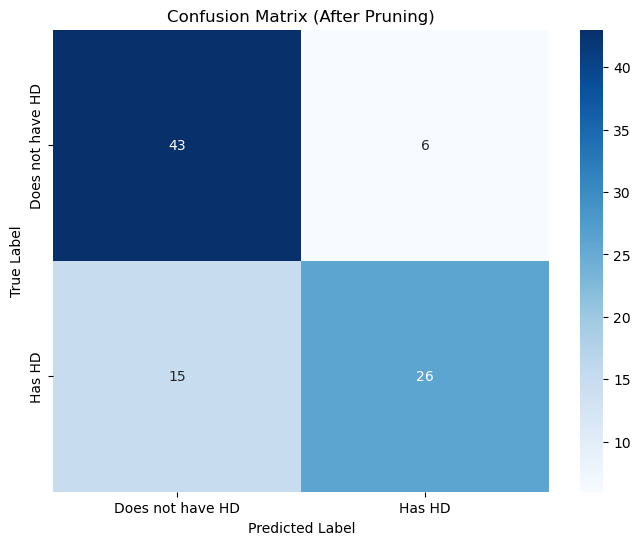

Accuracy on test set (pruned): 0.7667

Confusion Matrix (Pruned):
True Negatives: 43
False Positives: 6
False Negatives: 15
True Positives: 26


In [13]:
# Make predictions with pruned tree
y_pred_pruned = clf_pruned.predict(X_test)

# Calculate confusion matrix for pruned tree
cm_pruned = confusion_matrix(y_test, y_pred_pruned)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_pruned, annot=True, fmt='d', cmap='Blues', 
            xticklabels=["Does not have HD", "Has HD"],
            yticklabels=["Does not have HD", "Has HD"])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix (After Pruning)')
plt.savefig('../output/confusion_matrix_after_pruning.png', dpi=300, bbox_inches='tight')
plt.show()

# Calculate accuracy
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
print(f"Accuracy on test set (pruned): {accuracy_pruned:.4f}")
print(f"\nConfusion Matrix (Pruned):")
print(f"True Negatives: {cm_pruned[0, 0]}")
print(f"False Positives: {cm_pruned[0, 1]}")
print(f"False Negatives: {cm_pruned[1, 0]}")
print(f"True Positives: {cm_pruned[1, 1]}")

**Discussion:**

The pruning process using 4-fold cross-validation identified an optimal alpha of 0.0184, which substantially improved the model:

1. **Dramatic Reduction in Complexity:** The pruned tree has only 3 levels and 5 leaf nodes, compared to 10 levels and 35 leaves in the unpruned tree. This represents an 86% reduction in complexity, making the model much more interpretable and less prone to overfitting.

2. **Improved Performance:** The pruned model achieves 76.67% accuracy on the test set (compared to 73.33% before), demonstrating that the simpler model actually generalizes better to unseen data. The cross-validation accuracy of 76.86% closely matches the test accuracy, indicating good model stability.

3. **Enhanced Specificity:** The pruned model shows notably improved specificity at 87.8% (43/49), correctly identifying individuals without heart disease with much higher accuracy. False positives decreased from 14 to only 6, reducing unnecessary medical interventions.

4. **Trade-off in Sensitivity:** Sensitivity decreased to 63.4% (26/41), with false negatives increasing from 10 to 15. While this is a concern for medical diagnosis, the overall balance between false positives and false negatives may be acceptable depending on the screening context and subsequent diagnostic steps.

5. **Key Predictors:** The pruned tree reveals the most important features for prediction: chest pain type (cp_4.0), ST depression (oldpeak), maximum heart rate (thalach), and thalassemia (thal_7.0). These clinically relevant predictors align well with known cardiovascular risk factors.

6. **Model Validation:** The close alignment between cross-validation accuracy (76.86%) and test accuracy (76.67%) confirms that the pruning approach successfully prevents overfitting while maintaining predictive power, making this model more suitable for deployment in clinical settings.